In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Логистическая регрессия

### 1. Переход от МНК к методу максимального правдоподобия 

Пусть в каждой точке пространства объектов $\mathbb{X}$ задана вероятность того, что объект $x$ будет принадлежать к классу "+1" $P(y=1|x)$ (условная вероятность $y = 1$ при условии $x$). Она будет принимать значения от 0 до 1, и нам нужно каким-то образом ее предсказывать, но пока мы умеем только строить прогноз методами линейной регрессии с помощью некоего алгоритма $b(x)=\left \langle w,x_{i} \right \rangle$. У него есть проблема, связанная с тем, что скалярное произведение $\left \langle w,x_{i} \right \rangle$ не всегда возвращает значения в отрезке [0, 1]. Если полученные вещественные значения отнормировать по шкале [0, 1], то это уже не будет вероятностью. Также, если будет необходимо возвращать значения в отрезке [0, 1], то максимальная ошибка для MSE будет единица. Чтобы достичь такого условия, можно использовать некую функцию $\sigma:\mathbb{R} \rightarrow [0,1]$, которая будет переводить полученное в скалярном произведении значение в вероятность, пределы которой будут лежать в промежутке от 0 до 1. В модели логистической регрессии в качестве такой функции берется сигмоида, которая имеет вид:

$$\sigma(z) = \frac{1}{1 + exp(-z)}.$$

In [16]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

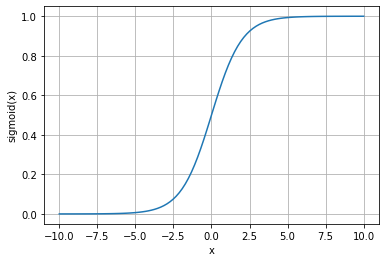

In [18]:
dots = np.linspace(-10, 10, 100)
sigmoid_value = list(map(sigmoid, dots))

plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.grid()
plt.plot(dots, sigmoid_value);

Одно из свойств сигмоиды - при нулевом аргументе она равна 0.5(50 процентов). Чем выше аргумент, тем сигмоида ближе к 1,
чем ниже - тем ближе к 0.

При использовании такой функции $\tilde{b}(x_{i}) = \sigma(\left \langle w,x_{i} \right \rangle)$ получаем, что вероятность отнесения объекта к классу "+1" $P(y=1|x)$, которую для краткости обозначим $p_{+}$, будет равняться

$$p_{+} = \sigma(\left \langle w,x_{i} \right \rangle) = \frac{1}{1 + exp(-\left \langle w,x_{i} \right \rangle)},$$

Чем больше будет скалярное произведение $\left \langle w,x_{i} \right \rangle$, тем выше будет предсказанная вероятность.

Чтобы понять, как его интерпретировать, выведем его из формулы выше:

$$\left \langle w,x_{i} \right \rangle = \text{ln} \frac{p_{+}}{1 - p_{+}}.$$

Таким образом, скалярное произведение вектора весов на вектор признаков представляет собой логарифм отношения вероятностей того, что y = 1 к вероятности того, что y = -1. Выражение под логарифмом называется _риском_, а вместе с логарифмом это выражение называется _логитом_. Поэтому метод и называется логистической регрессией: мы приближаем логит линейной комбинацией признаков и весов. Т.е. для того, чтобы решить проблему нахождения скалярного произведения матрицы весов на матрицу признаков, можно решать задачу при помощи MSE и получившийся ответ применить к сигмоиде.

### 2. Метод максимального правдоподобия

Далее для обучения этой модели нам потребуется использовать _метод максимального правдоподобия_. Его сущность заколючается в выборе гипотезы, при которой вероятность получить имеющееся наблюдение максимальна.

С точки зрения реализуемого алгоритма вероятность того, что в выборке встретится объект $x_{i}$ c классом $y_{i}$, равна

$$P(y=y_{i}|x_{i}) = p_{+}^{[y_{i}=+1]}(1-p_{+})^{[y_{i}=-1]}.$$

Исходя из этого, правдоподобие выборки (т.е. вероятность получить такую выборку с точки зрения алгоритма) будет равняться произведению вероятностей получения каждого имеющегося ответа:

$$P(y|X) = L(X) = \prod^{l}_{i=1} p_{+}^{[y_{i}=+1]}(1-p_{+})^{[y_{i}=-1]}.$$

### 3. Логарифмическая функция потерь

Правдоподобие можно использовать как функционал для обучения алгоритма, однако, удобнее взять от него логарифм, так как в этом случае произведение превратится в сумму(по свойству логарифма), а сумму гораздо проще оптимизировать. Также, в отличие от рассмотренных ранее функций потерь, правдоподобие требуется максимизировать для обучения алгоритма, а не минимизировать. Поэтому для большего удобства перед правдоподобием ставят минус, поскольку функции потери в задачах регрессии принято минимизировать. В итоге получим:

$$-\text{ln}L(X) = -\sum^{l}_{i=1}([y_{i} = +1] \text{ln}p_{+}) + [y_{i} = -1]\text{ln}(1 - p_{+}))).$$

![title](loggraph.gif)

Из графика видим, что логарифм от нуля не определён. Ноль под логарифмом может оказаться тогда, когда предсказанное значение 
класса прямо противоположно истинному, поскольку получим бесконечность и бесконечную ошибку. При использовании MSE ошибка может
быть равна максимум единице. Для алгоритма это свойство выполянет функцию очень сильного "штрафа" и он стремится предсказывать
значение вероятности(класса) точнее.

Если мы подставим в нее полученное ранее выражение для $p_{+}$ для сигмоиды, получим логарифмическую функцию потерь:

$$-\text{ln}L(X) = -\sum^{l}_{i=1}([y_{i} = +1] \text{ln}\frac{1}{1 + exp(-\left \langle w,x_{i} \right \rangle)}) + [y_{i} = -1]\text{ln}(1 - \frac{1}{1 + exp(-\left \langle w,x_{i} \right \rangle)}))) =$$

$$=-\sum^{l}_{i=1} \text{ln}(1 + exp(\left \langle w,x_{i} \right \rangle))$$

### 4. Оценка качества классификации

|  <empty>   | $$y = +1$$ | $$y = -1$$ |
--- | --- | ---
| __$$a(x) = +1$$__  |   TP    |   FP   |
| __$$a(x) = -1$$__ |   FN    |   TN   |

Cверху отложены истинные ответы, слева - ответы алгоритма. Когда алгоритм относит объект к классу "+1", говорят, что он _срабатывает_, а когда к "-1", - _пропускает_. Если алгоритм сработал (дал положительный ответ) и объект действительно относится к классу "+1", говорят, что имеет место верное срабатывание/верный положительный ответ (True Positive, TP), а если объект не относится к классу "+1", это ложное срабатывание (False Positive, FP). Если алгоритм пропускает объект, а его истинный класс "+1", это ложный пропуск/ложный негативные ответ (False Negative, FN), а если истинный класс объекта "-1", имеет место истинный пропуск (True Negative, TN). При такой классификации уже есть два вида ошибок - ложные срабатывания и ложные пропуски. По главной диагонали в матрице ошибок располагаются верные ответы, по побочной - неверные.

**Accuracy**`

Наиболее очевидным и простым способом является расчет _доли правильных ответов_:

$$accuracy(a,x) = \frac{TP+TN}{TP+TN+FP+FN}.$$

Эта метрика очень легко интерпретируется, однако, имеет определенные недостатки:

- Она может неадекватно работать на несбалансированных выборках, в которых объектов одного класса намного больше остальных: например, если у нас имеется выборка с 950 объектами класса +1 и 50 класса -1, обыкновенная константная модель классификатора, которая на всех объектах отдает ответ +1, будет иметь долю правильных ответов 0,95, при этом сам классификатор является абсолютно бесполезным. Методом борьбы с этим заключается в введении коэффициента $q_{0}$, равного доле объектов самого большого класса. Доля правильных ответов для корректных алгоритмов должна лежать в промежутке $[q_{0}, 1]$

- Она не учитывает "цены ошибок". В некоторых прикладных задачах ошибки разного рода могут иметь разную важность. Например, если говорить о кредитном скоринге, при постановке задачи необходимо определить, какая ошибка будет хуже: выдать кредит "плохому" клиенту или не выдать "хорошему". При этом используемая метрика качества должна учитывать цены разных ошибок.

**Точность и полнота**

Точность (precision) представляет из себя долю истинных срабатываний от общего количества срабатываний. Она показывает, насколько можно доверять алгоритму классификации в случае срабатывания

$$precision(a, X) = \frac{TP}{TP+FP}.$$

Полнота (recall) считается как доля объектов, истинно относящихся к классу "+1", которые алгоритм отнес к этому классу

$$recall(a, X) = \frac{TP}{TP+FN},$$

здесь $TP+FN$ как раз будут вместе составлять весь список объектов класса "+1".

Чтобы максимизировать precision, нужно чтобы было как можно меньше ошибок отнесения объекта к классу 1, когда в реальности
это событие - 0. Этот вариант подходит тогда, когда цена ошибки большая. Максимизировать recall можно при помощи минимизации количества случаев отнесения 
события к 0, когда в реальности это событие - 1(FN). Эту метрику лучше использовать тогда, когда цена воздействия на событие маленькая.

Например, если в задаче кредитного скоринга банк ставит цель возврата 90% кредитов, задачей ставится максимизация полноты при условии точности не ниже 0.9. А если при распознавании спама стоит требование, например, распознавать 95% спам-писем, задача состоит в максимизации точности при условии полноты не ниже 0.95.

**F1 мера(гармоническое среднее)**

В некоторых случаях требуется максимизировать и полноту и точность. _F-мера_ - это среднее гармоническое между точностью и полнотой.

$$F = \frac{2 \cdot precision \cdot recall }{ presision + recall}.$$

В отличие от, например, среднего арифметического, если хотя бы один из аргументов близок к нулю, то и среднее гармоническое будет близко к нулю.

**ROC - AUC**

### 5. Примеры

-Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.
-Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан -функцией eval_model и X, на выходе - массив y_pred_proba).
-Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).
-Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.
-Могла ли модель переобучиться? Почему?

### 5.1. Логистическая функция потерь

In [5]:
#Проверка на ненулевое выражение под логарифмом
def log_checking(y_pred):
    assert y_pred != 0
    assert y_pred != 1

In [6]:
#Подсчёт логистической функции потерь с проверкой на ненулевое выражение под логарифмом
def calc_logloss(y, y_pred):
    log_checking(y_pred)
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    return err

### 5.2. Минимизация log_loss

In [13]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [41]:
#Проходим по вариантам aplha и iterations
def eval_logit(X, y, iterations=None, alpha=None):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    
    for i in range(1, iterations+1):
        for j in alpha:
            z = np.dot(W, X)
            y_pred = sigmoid(z)
            err = calc_logloss(y, y_pred)
            W -= alpha * (1/n * np.dot((y_pred - y), X.T))
    
    if i % (iterations / 10) == 0:
        print(i, W, err)
    
    return W

In [40]:
#W = eval_logit(X, y, iterations=[100, 300, 700], alpha=[1e-5, 1e-3, 0.1])

### 5.3. Функция, рассчитывающая вероятность отнесения к классу 1

In [10]:
def calc_pred_proba(W, X):
    y_pred_proba = 1/(1 + np.exp(-(np.dot(X,W))))
    return y_pred_proba

### 5.4. Функция, рассчитывающая вероятность отнесения к классу 0 или 1

In [11]:
# За порог отнесения к тому или иному классу примем вероятность 0.5
def calc_pred(W, X):
    m = X.shape[1]
    y_pred = np.zeros((1, m))
    
    y_pred_proba = calc_pred_proba(W, X)
    
    for i in range(y_pred_proba.shape[1]):
        
        if y_pred_proba[:, i] > 0.5:
            y_pred[:, i] = 1
        else:
            y_pred[:, i] = 0
    
    return y_pred

### 5.5. Расчёт Accuracy, матрицы ошибок, точности и полноты, F1 score

In [26]:
#Матрица ошибок 1 и 2 рода
def matrix_errors(y, y_pred):
    spam = zip(y, y_pred)
    
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    
    for i in range(len(spam)):
        if spam[i][0] == 1 and spam[i][1] == 1: #хорошего человека назвали хорошим
            TP += 1
        elif spam[i][0] < spam[i][1]: #плохого человека назвали хорошим
            FP += 1
        elif spam[i][0] < spam[i][1]: #хорошего человека назвали плохим
            FN += 1
        else:
            TN += 1 #плохого человека назвали плохим
    
    return TP, TN, FP, FN

In [27]:
#Accuracy
def calc_accuracy(TP, TN, FP, FN):
    acc = (TP+TN)/(TP+TN+FP+FN)
    return acc

In [28]:
#Precision
def calc_precision(TP, FP):
    prec = TP/(TP+FP)
    return prec

In [30]:
#Recall
def calc_recall(TP, FN):
    rec = TP/(TP+FN)
    return rec

In [31]:
#F1 score
def f1_score(prec, rec):
    f1 = (2*prec*rec)/(prec+rec)
    return f1

Модель могла переобучиться, поскольку мы не делали валидацию (на отложенной выборке либо кроссвалидацию)

### 5.6. Реализация с L1 и L2 регуляризацией

In [39]:
def eval_logit(X, y, iterations=None, alpha=None, reg=0, lambda_=None):
    assert reg == 'l2', 'Допустимые значения reg равны l2, l1 либо 0'
    assert reg == 'l1', 'Допустимые значения reg равны l2, l1 либо 0'
    assert reg == 0, 'Допустимые значения reg равны l2, l1 либо 0'
    
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        
        if reg == 'l2':
            W -= alpha * ((1/n * np.dot((y_pred - y), X.T)) +  2 * lambda_ * W)
        if reg == 'l1':
            W -= alpha * ((1/n * np.dot((y_pred - y), X.T)) + 2 * ((lambda_* W)/np.abs(W)))
        if reg == 0:
            W -= alpha * (1/n * np.dot((y_pred - y), X.T))
    
    if i % (iterations / 10) == 0:
        print(i, W, err)
    
    return W